# Allstate Claims Severity 

## Data Exploration, Cleaning and Visualizations of Dataset

The Allstate Corporation is the largest personal lines insurer in the United States and the largest that is publicly held. Due to its large size, they have to tackle a large number of claims which takes time done by a human.
Allstate is currently developing automated methods of predicting the cost, and hence severity, of claims. The problem is to create an algorithm which accurately predicts claims severity. Basically, given the data , predict the amount to be paid by Allstate.


In [0]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

## Importing the libraries

Now, we import the libraries which are required for EDA and extract the data.

In [0]:
import pandas                                      #to read and manipulate data
import zipfile                                     #to extract data
import numpy as np                                 #for matrix operations
#read will be imported as and when required
#read the train and test zip file
zip_ref = zipfile.ZipFile("train.csv.zip", 'r')    
zip_ref.extractall()                               
zip_ref.close()

## Reading the data

Now, we read the training and testing data in pandas objects

In [3]:
train_data = pandas.read_csv("train.csv",error_bad_lines=False)

#Print all rows and columns. Dont hide any
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)

print(train_data.head(5))

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13  \
0   1    A    B    A    B    A    A    A    A    B     A     B     A     A   
1   2    A    B    A    A    A    A    A    A    B     B     A     A     A   
2   5    A    B    A    A    B    A    A    A    B     B     B     B     B   
3  10    B    B    A    B    A    A    A    A    B     A     A     A     A   
4  11    A    B    A    B    A    A    A    A    B     B     A     B     A   

  cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25  \
0     A     A     A     A     A     A     A     A     A     B     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     B     A     A   
4     A     A     A     A     A     A     A     A     A     B     A     A   

  cat26 cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 cat36 

In [4]:
print(train_data.shape)                                  #number of training datapoints given and features.

(188318, 132)


In [0]:
import copy
test_data = copy.deepcopy(train_data.iloc[150000:])
train_data = train_data.iloc[:150000]

In [6]:
print(train_data.shape)
print(test_data.shape)

(150000, 132)
(38318, 132)


In [7]:
y_true = test_data['loss']

#print the first 5 entries of test data also.
print(test_data.head(5))

            id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12  \
150000  467729    A    A    A    A    A    B    A    A    A     A     A     A   
150001  467734    A    B    A    A    B    A    A    A    B     B     A     A   
150002  467739    A    B    A    A    A    A    A    A    B     B     B     B   
150003  467740    A    A    A    A    A    B    A    A    A     A     A     A   
150004  467743    A    B    A    A    A    A    A    A    B     A     B     A   

       cat13 cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23  \
150000     A     A     A     A     A     A     A     A     A     A     A   
150001     B     A     A     A     A     A     A     A     A     A     A   
150002     B     A     A     A     A     A     A     A     A     A     A   
150003     A     A     A     A     A     A     A     A     A     A     A   
150004     A     A     A     A     A     A     A     A     A     A     A   

       cat24 cat25 cat26 cat27 cat28 cat29 cat30 cat31 c

In [8]:
print(train_data.describe())                             #basic information regarding the train_data

                  id          cont1          cont2          cont3  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean   234490.288887       0.493660       0.507320       0.498990   
std    134937.378713       0.187537       0.207229       0.202252   
min         1.000000       0.000016       0.001149       0.002634   
25%    117537.750000       0.346090       0.358319       0.336963   
50%    234497.500000       0.475784       0.555782       0.527991   
75%    351272.000000       0.623912       0.681761       0.634224   
max    467728.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean        0.491802       0.487722       0.490615       0.484894   
std         0.211373       0.209136       0.205168       0.178525   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.2811

## Skewness of the data

Now, we check the skewness of the data. The more closer it is to 0 , the better. Skewness basically means if out data is concentrated on one end of the range. We like our data to be as middle as possible.

In [9]:
print(train_data.skew())                                 

id       -0.004008
cont1     0.517909
cont2    -0.312079
cont3    -0.010250
cont4     0.415957
cont5     0.680679
cont6     0.464061
cont7     0.828456
cont8     0.679399
cont9     1.074892
cont10    0.356928
cont11    0.282640
cont12    0.293526
cont13    0.385175
cont14    0.243783
loss      3.901837
dtype: float64


In [10]:
print(test_data.skew())

id       -0.001863
cont1     0.510621
cont2    -0.306505
cont3    -0.009054
cont4     0.416662
cont5     0.685321
cont6     0.450110
cont7     0.816640
cont8     0.665771
cont9     1.062892
cont10    0.347399
cont11    0.273726
cont12    0.286009
cont13    0.363462
cont14    0.267875
loss      3.343821
dtype: float64


While others features are allright, loss is positively skewed. To work with it, we need to normalize it which we will later do by applying log function to it.

Now, we will visualize the voilin plot of all the features and try to understand the data better.

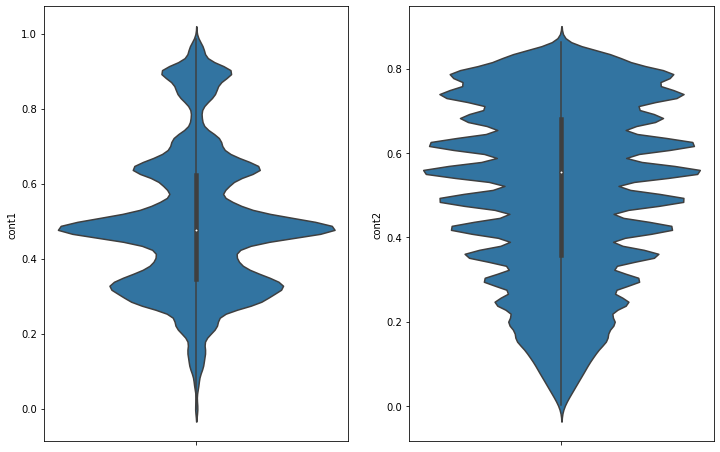

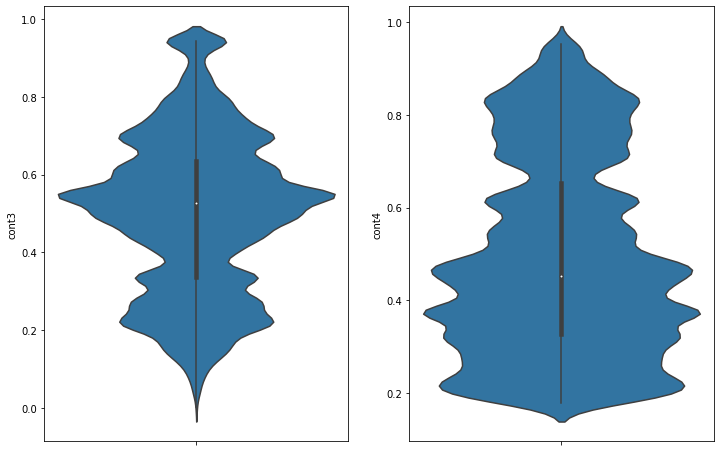

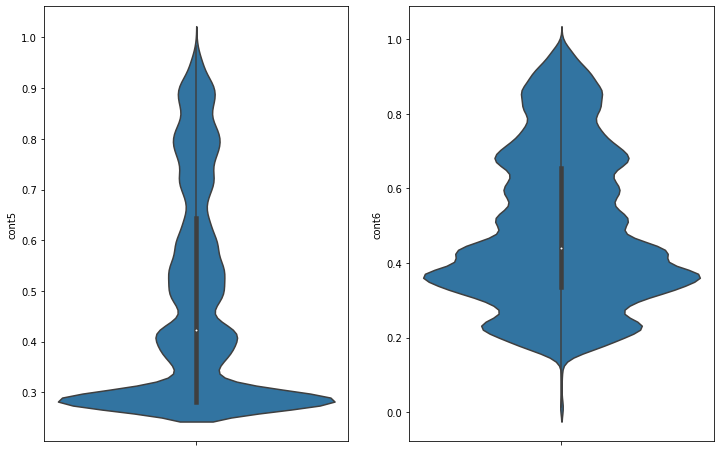

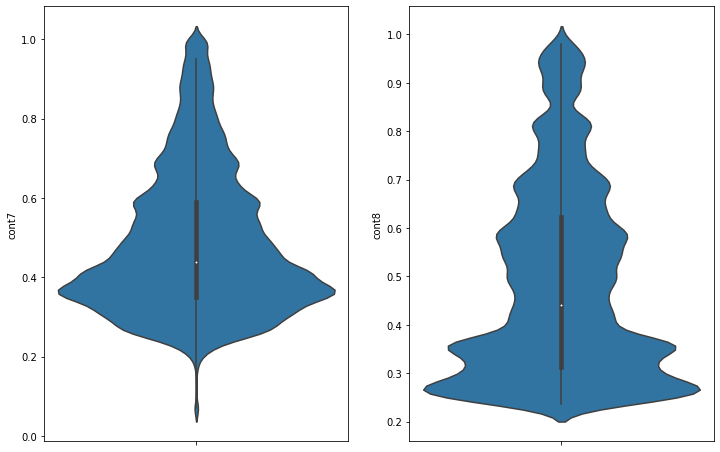

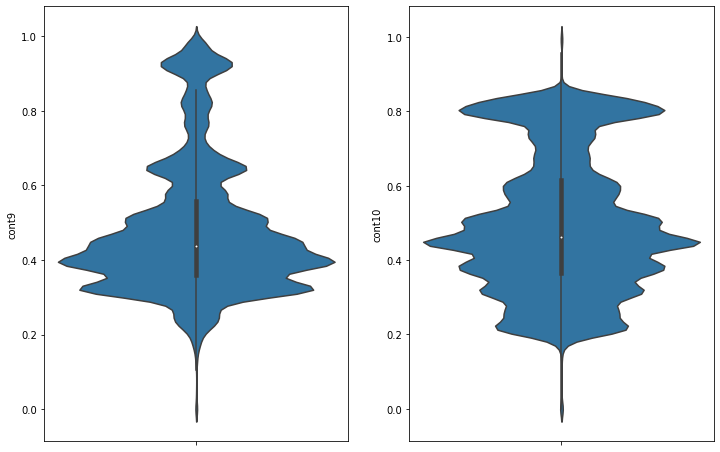

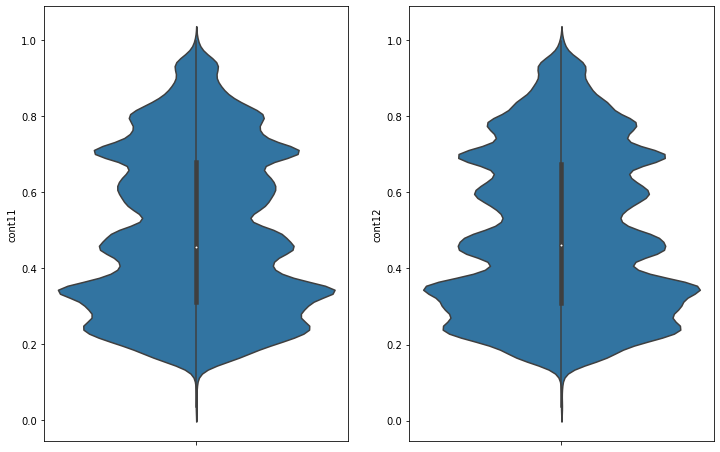

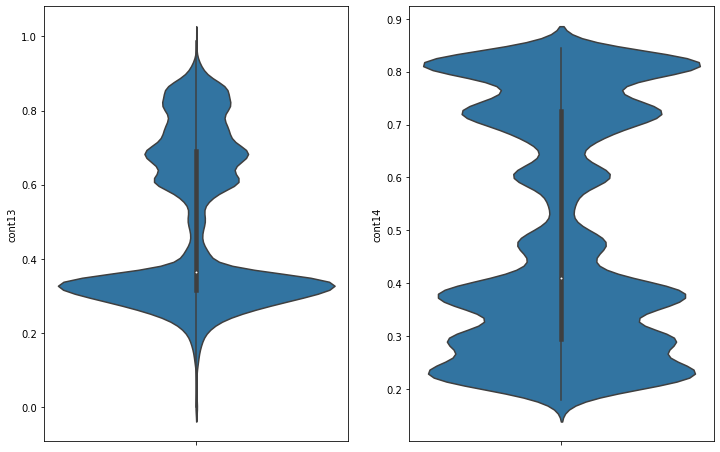

In [11]:
# We will visualize all the continuous attributes using Violin Plot - a combination of box and density plots

#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

#range of features considered
split = 117

#number of features considered
size = 15

#create a dataframe with only continuous features
data=train_data.iloc[:,split:] 

#get the names of all the columns
cols=data.columns 

#Plot violin for all attributes in a 7x2 grid
n_cols = 2
n_rows = 7

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=train_data, ax=ax[j])
plt.show()

Cont1 has many values close to 0.5.
Cont2 has a pattern where there a several spikes at specific points.
Cont5 has many values near 0.3.
Cont14 has a distinct pattern. 0.22 and 0.82 have a lot of concentration.
Loss distribution must be converted to normal.

In [12]:
print(test_data.shape)                                 #number of testing datapoints given and its features.

(38318, 132)


The test data should have one less column than the training data which makes sense because it must not be containing the target variable. To check , let's print first five entries of it.

In [13]:
print(test_data.head(5)) 

            id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12  \
150000  467729    A    A    A    A    A    B    A    A    A     A     A     A   
150001  467734    A    B    A    A    B    A    A    A    B     B     A     A   
150002  467739    A    B    A    A    A    A    A    A    B     B     B     B   
150003  467740    A    A    A    A    A    B    A    A    A     A     A     A   
150004  467743    A    B    A    A    A    A    A    A    B     A     B     A   

       cat13 cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23  \
150000     A     A     A     A     A     A     A     A     A     A     A   
150001     B     A     A     A     A     A     A     A     A     A     A   
150002     B     A     A     A     A     A     A     A     A     A     A   
150003     A     A     A     A     A     A     A     A     A     A     A   
150004     A     A     A     A     A     A     A     A     A     A     A   

       cat24 cat25 cat26 cat27 cat28 cat29 cat30 cat31 c

Let's see the kde plot of log loss.

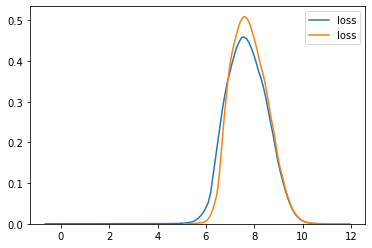

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#shift is another hyper-parameter.
shift = 200

ax = sns.kdeplot(np.log(train_data['loss']),legend= True)                        #to visualize the log loss without shift
ax = sns.kdeplot(np.log(train_data['loss']+shift),legend= True)                  #to visualize the log loss with shift

plt.show()

Shift is another hyper-parameter. it sometimes gives better performance. I have taken it from the discussion linked here - https://www.kaggle.com/c/allstate-claims-severity/discussion/24611#141269

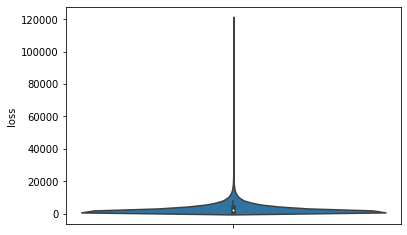

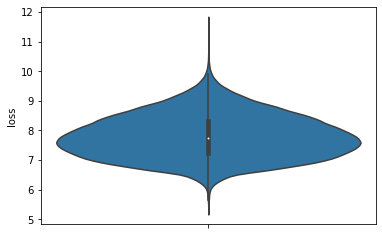

In [15]:
#getting the id column from test set
ids = test_data['id']

target = train_data['loss']

#drop the unnecessary column id and loss from both train and test set.
train_data.drop(['id','loss'],1,inplace=True)
test_data.drop(['id','loss'],1,inplace=True)

#violin plot to visualize loss before applying log transformation.
sns.violinplot(data=train_data,y=target)  
plt.show()

target = np.log(target+shift)

#violin plot to visualize loss after applying log transformation.
sns.violinplot(data=train_data,y=target)  
plt.show()

Now that the loss has been normalized, We can proceed futher.

We will find the correlation between different features.

In [16]:
# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore categorical data

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.81
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53


Strong correlation is observed between the following pairs.
This represents an opportunity to reduce the feature set through transformations such as PCA.

Next, we count the number of different labels in each categorical feature.

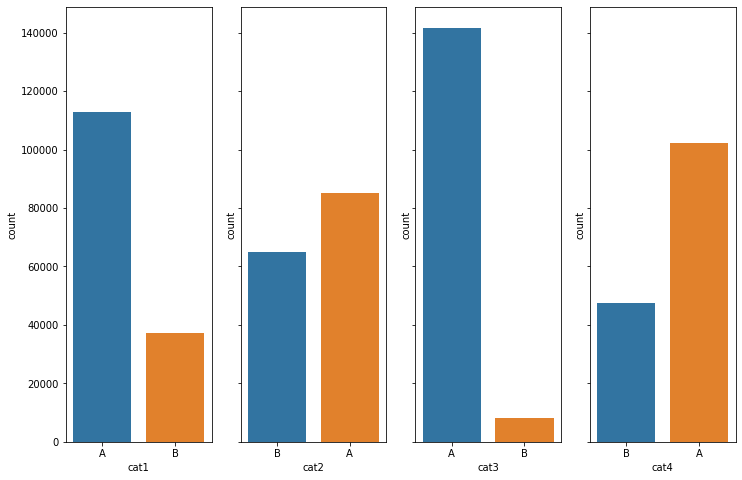

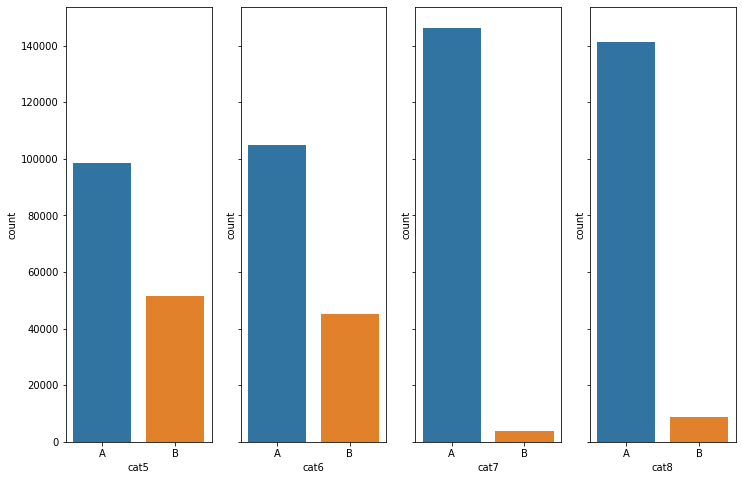

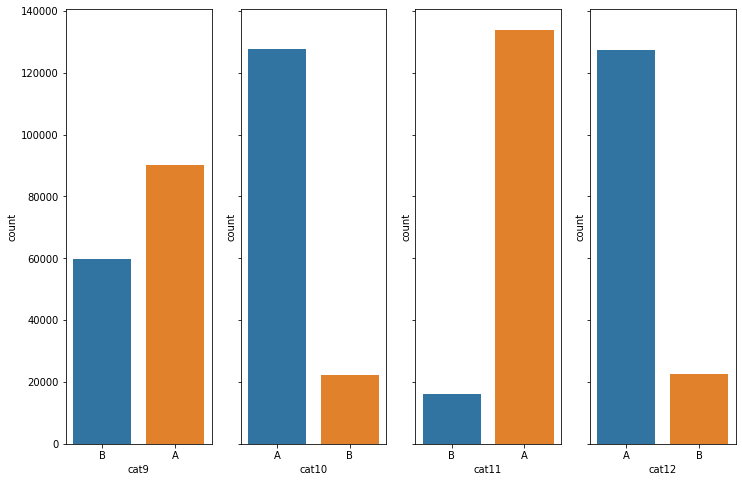

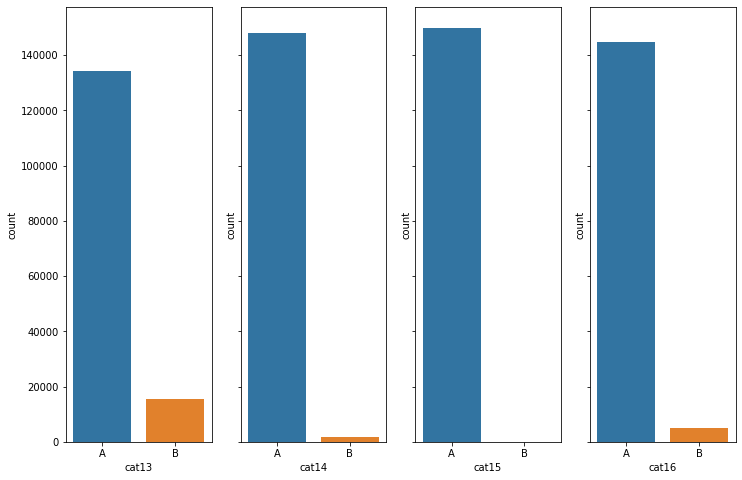

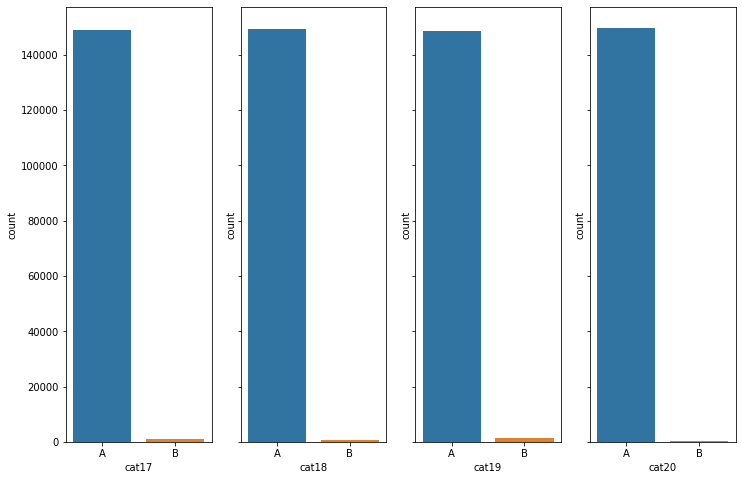

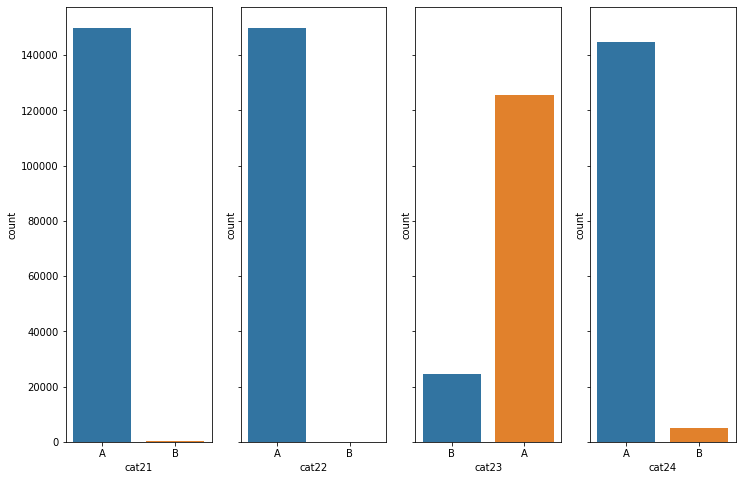

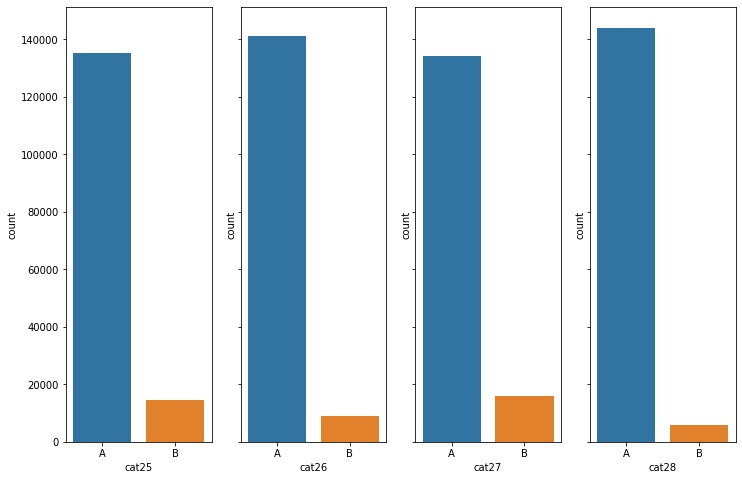

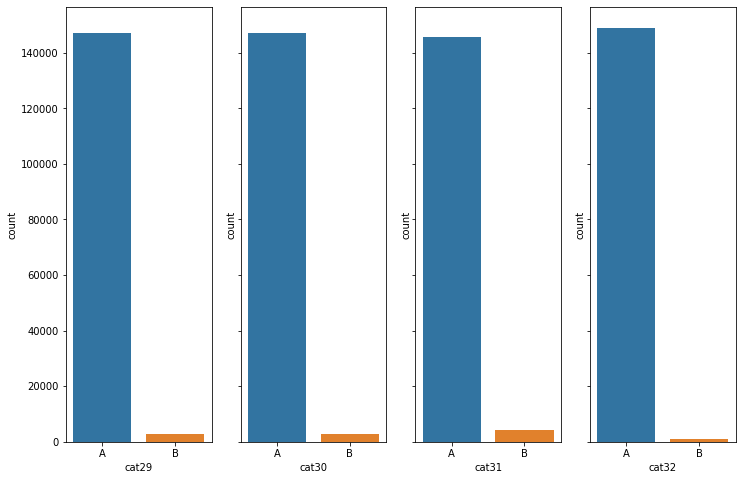

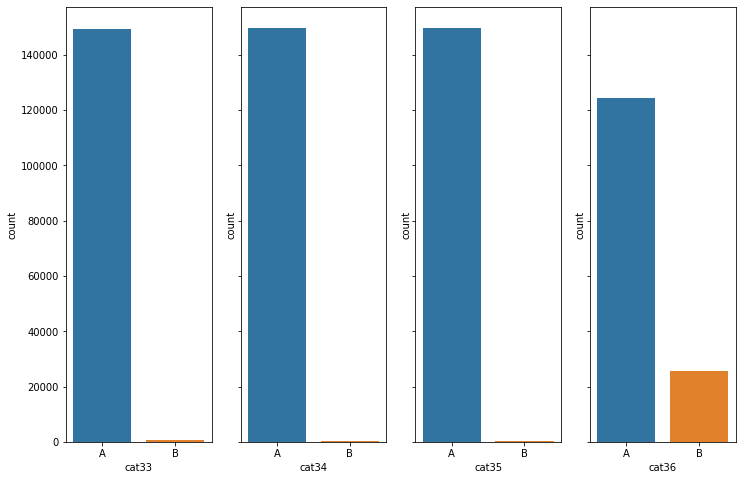

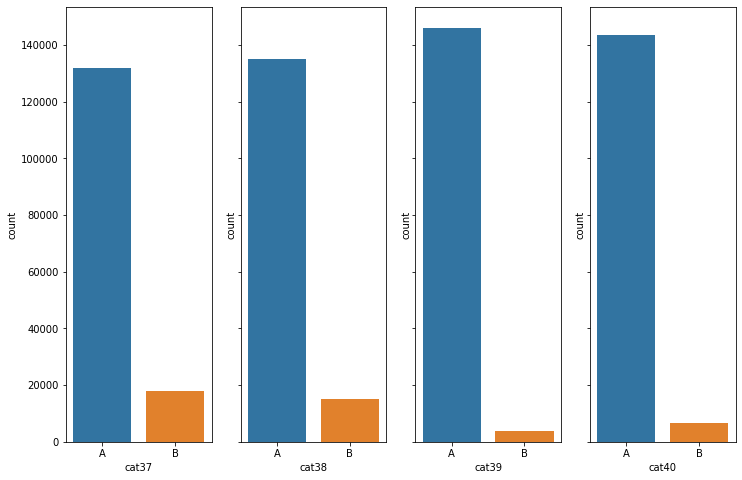

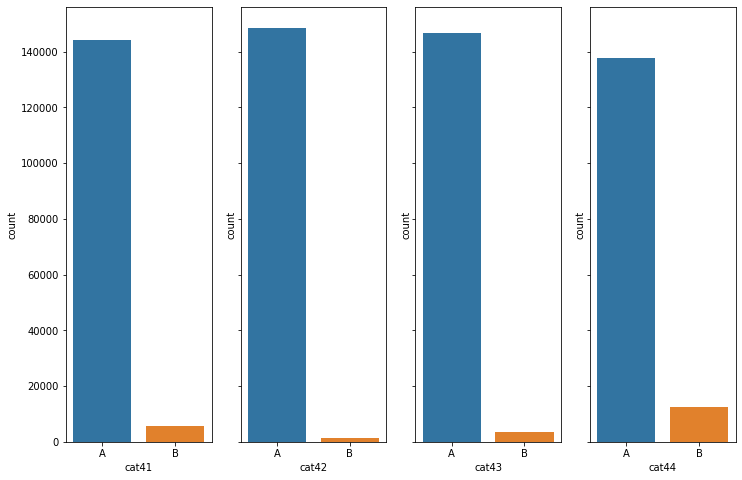

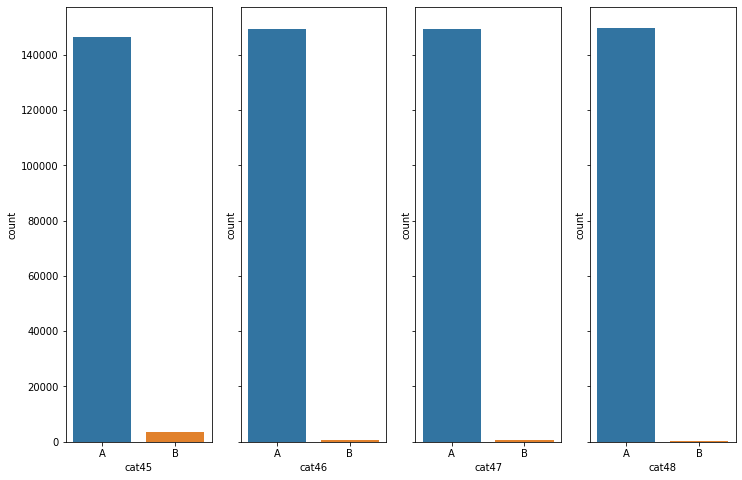

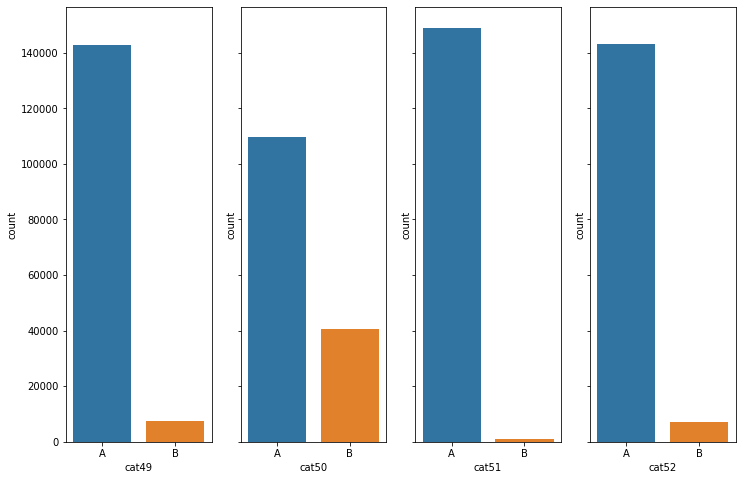

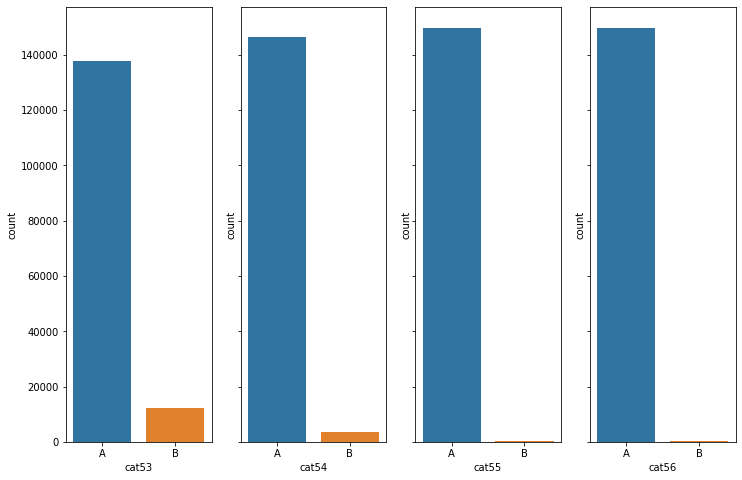

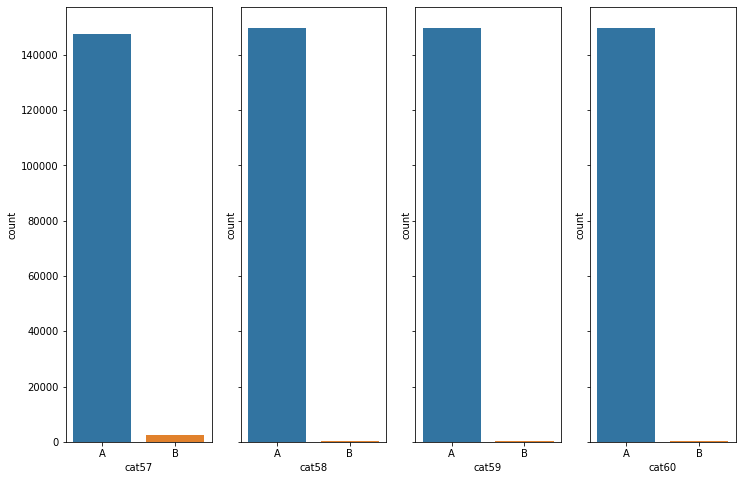

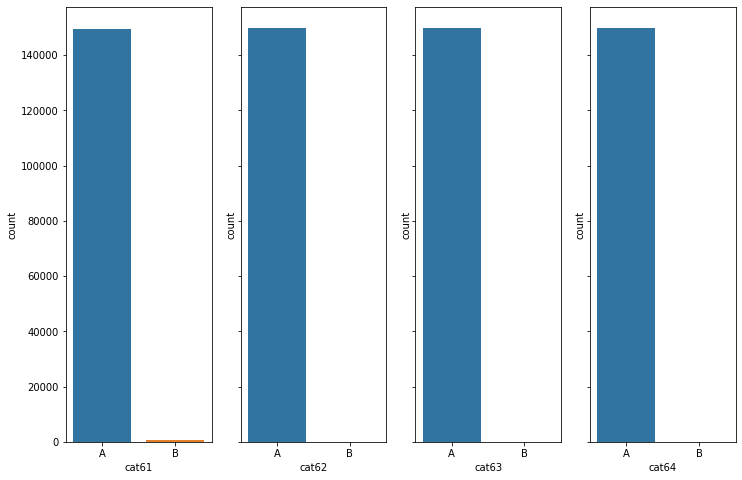

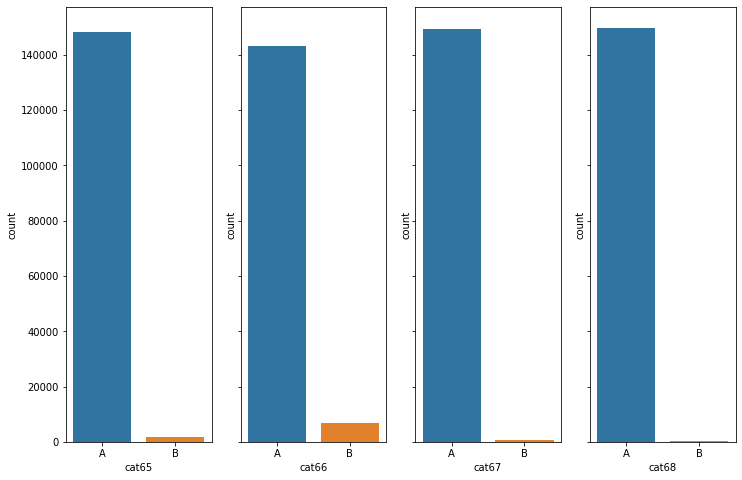

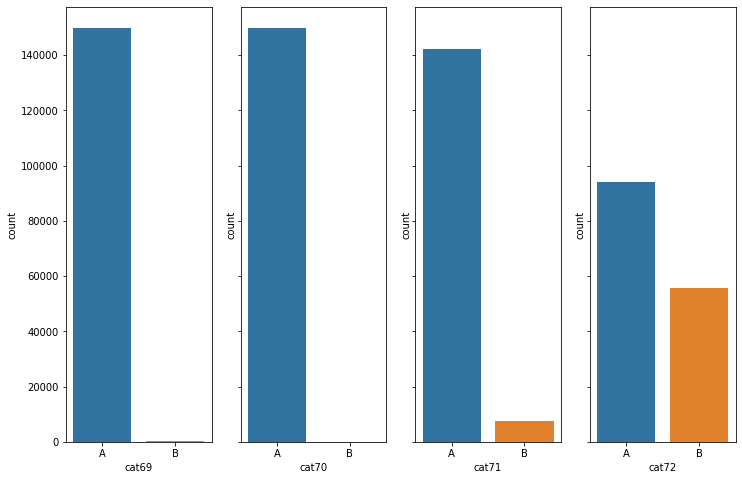

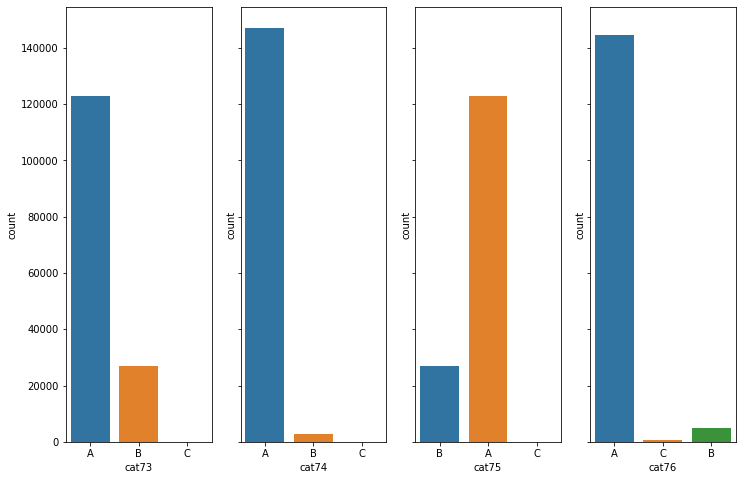

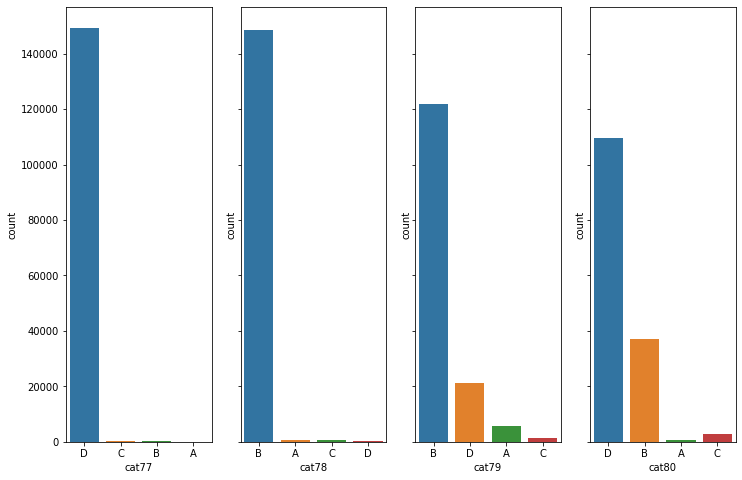

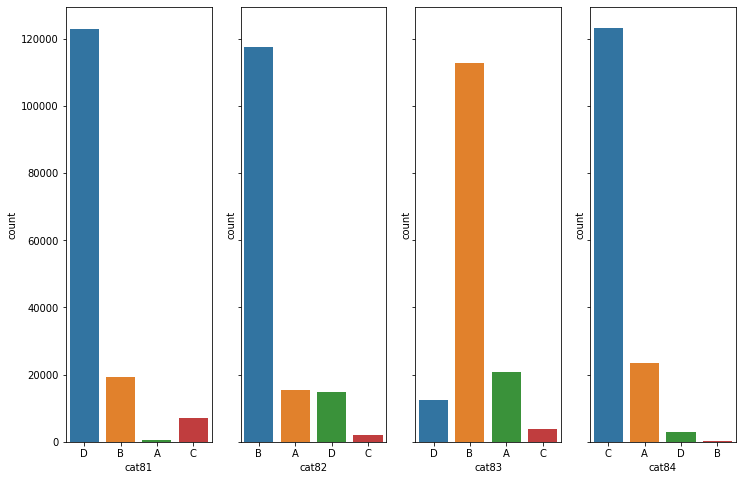

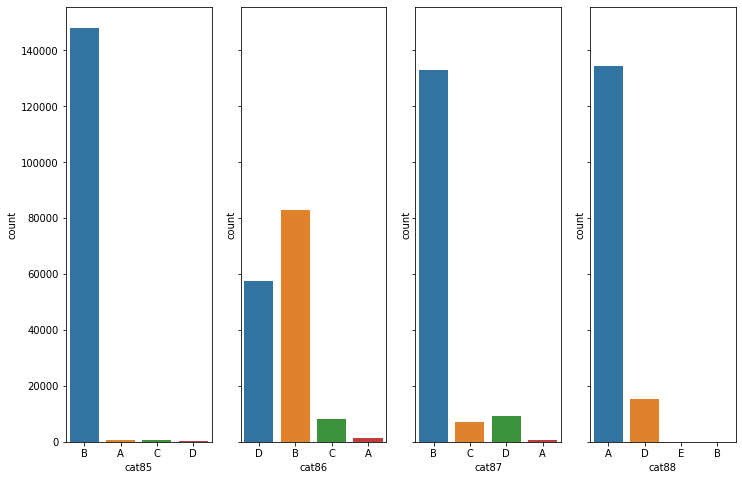

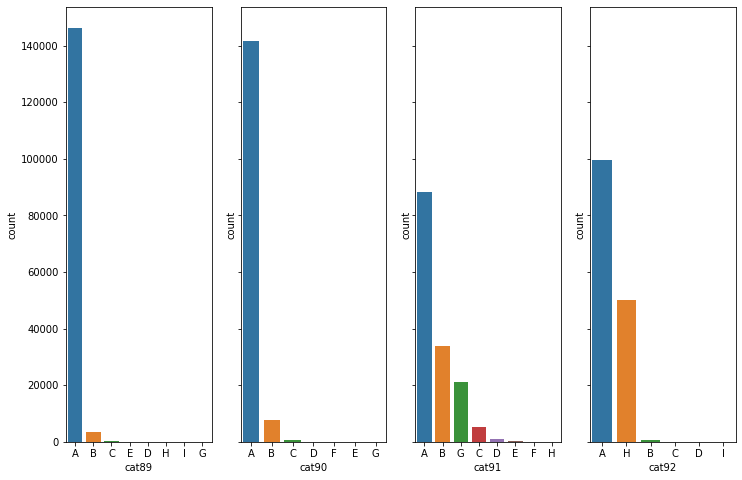

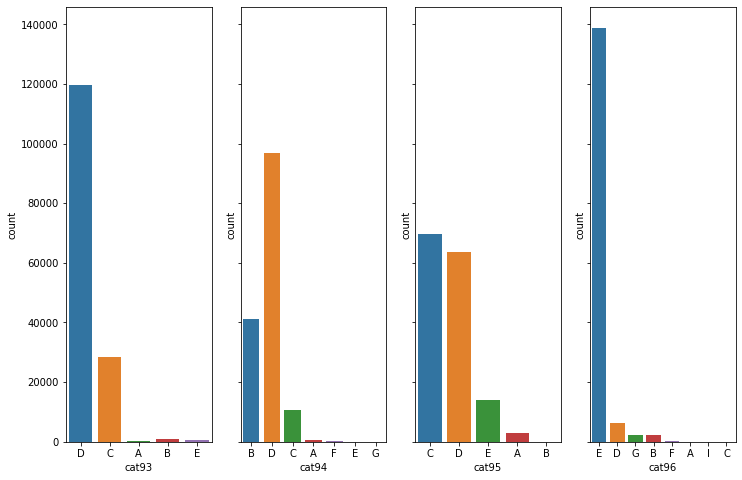

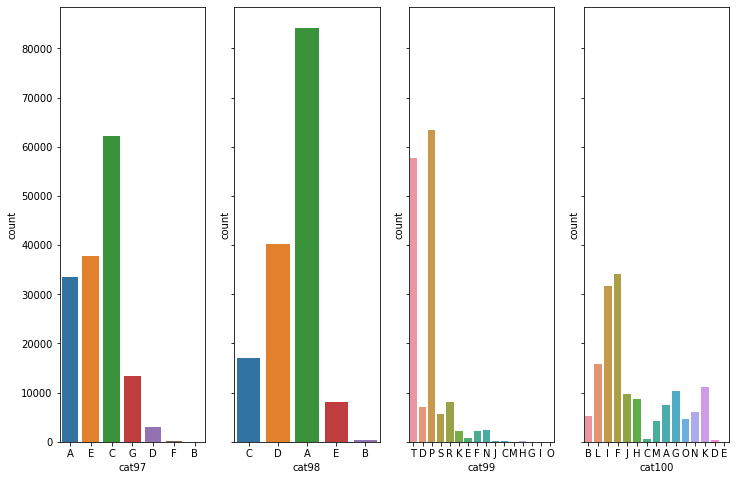

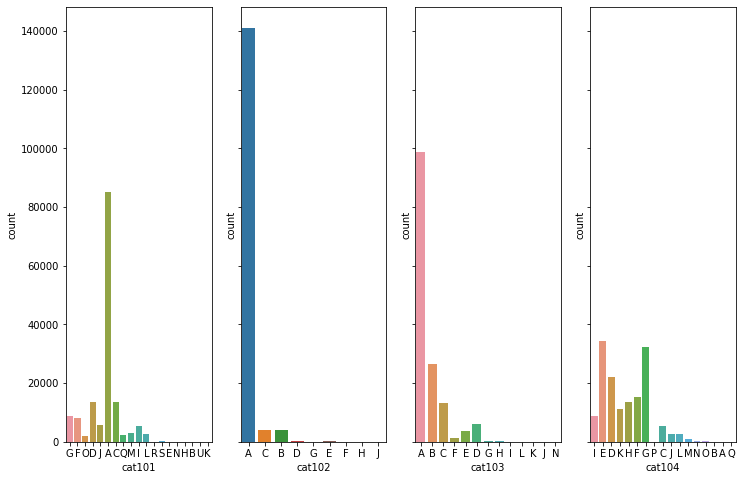

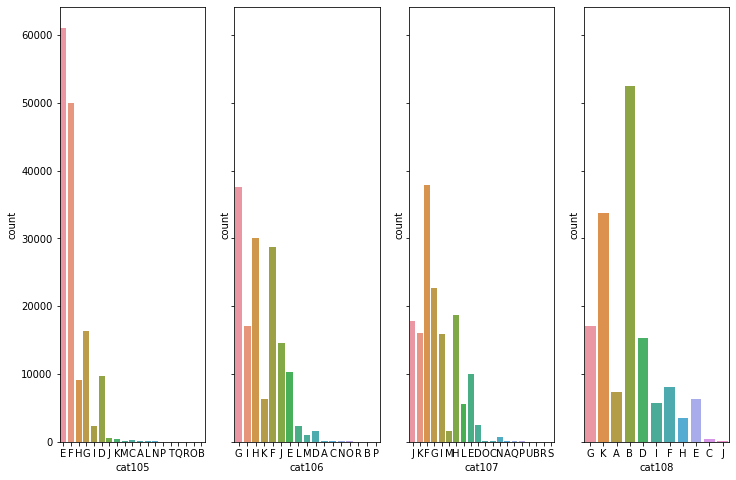

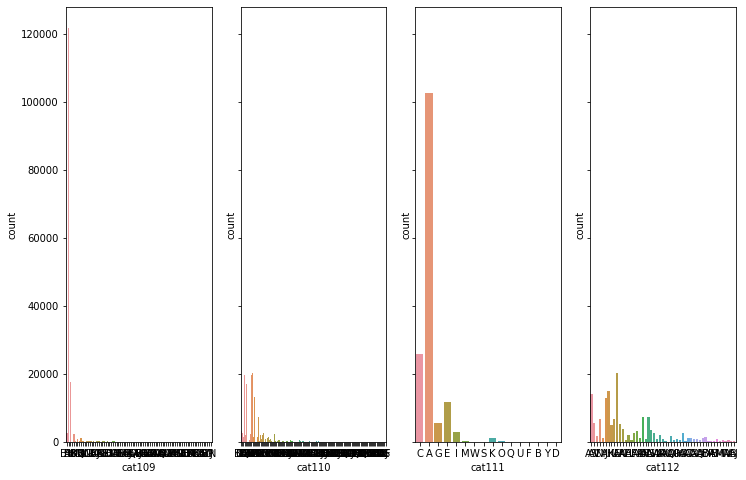

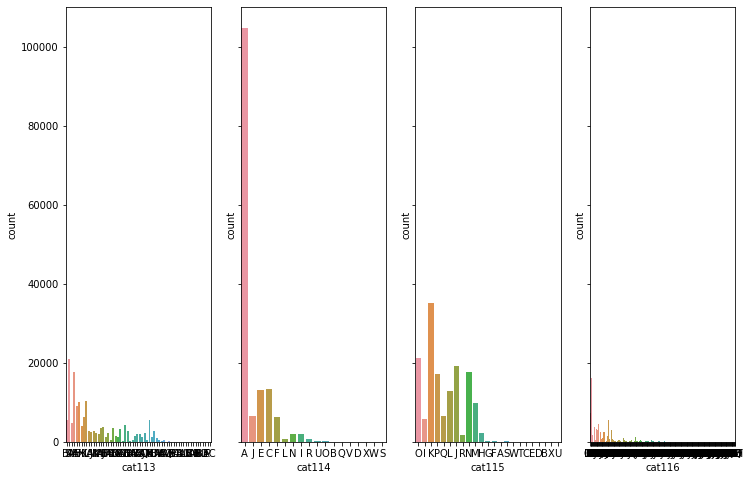

In [17]:
#names of all the columns
cols = train_data.columns

#Plot count plot for all attributes in a 29x4 grid
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=train_data, ax=ax[j])
plt.show()

Cat1 to cat72 have only two labels A and B. In most of the cases, B has very few entries.

Cat73 to cat 108 have more than two labels.

Cat109 to cat116 have many labels.

## Converting categorical features to numeric values

Since, all the models expect matrices consisting of numbers and not the alphabetical values, We need to convert the the values to corresponding numeric values. One problem in that is training set may contain categorical values not available in testing set and vice-versa. To solve it, we will merge the two datasets so that we can factorize them easily.

In [0]:
#merging both the datasets to make single joined dataset
joined = pandas.concat([train_data, test_data],ignore_index = True)
del train_data,test_data                                         #deleting previous one to save memory.

cat_feature = [n for n in joined.columns if n.startswith('cat')]  #list of all the features containing categorical values

#factorizing them
for column in cat_feature:
    joined[column] = pandas.factorize(joined[column].values, sort=True)[0]
        
del cat_feature

Let's visualize the first five entries of the dataset now.

In [19]:
print (joined.head(5))

   cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10  cat11  cat12  \
0     0     1     0     1     0     0     0     0     1      0      1      0   
1     0     1     0     0     0     0     0     0     1      1      0      0   
2     0     1     0     0     1     0     0     0     1      1      1      1   
3     1     1     0     1     0     0     0     0     1      0      0      0   
4     0     1     0     1     0     0     0     0     1      1      0      1   

   cat13  cat14  cat15  cat16  cat17  cat18  cat19  cat20  cat21  cat22  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      1      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

   cat23  cat24  cat25  cat26  cat27  cat28  cat29  cat30  cat31  ca

## Bifurcating the joined data into training and testing data again

In [20]:
#used when submission is made on kaggle

#extracting training and testing data form joined data
'''train_data = joined[joined['loss'].notnull()]
test_data = joined[joined['loss'].isnull()]
del joined
'''

train_data = joined.iloc[:150000,:]
test_data = joined.iloc[150000:,:]
print (test_data.shape)

(38318, 130)


In [21]:
test_data.describe()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.00000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000,38318.000000
mean,0.252362,0.433034,0.054309,0.321181,0.345269,0.297510,0.023227,0.057780,0.399316,0.148833,0.106582,0.152200,0.101702,0.011848,0.000130,0.034005,0.006655,0.004671,0.010178,0.000966,0.002192,0.000157,0.163578,0.033222,0.098178,0.061694,0.108643,0.038546,0.019938,0.019625,0.028707,0.005820,0.005298,0.003288,0.001096,0.171042,0.119396,0.103111,0.025836,0.043504,0.037815,0.009134,0.021739,0.084347,0.023305,0.005115,0.003967,0.001409,0.048411,0.267081,0.006472,0.046819,0.079780,0.023096,0.000600,0.000992,0.015371,0.000992,0.001566,0.002166,0.004045,0.000104,0.000313,0.000183,0.011639,0.043609,0.00381,0.000731,0.001644,0.000130,0.051516,0.371836,0.184274,0.019182,0.181351,0.042904,2.992667,1.003393,1.253014,2.469257,2.685422,1.112219,1.061068,1.706561,1.005872,1.826348,1.167206,0.208283,0.024740,0.058824,1.177671,1.684091,2.792160,2.376011,2.564069,3.940602,2.444569,1.267785,12.476721,7.434704,2.549298,0.097213,0.649721,5.578736,4.776737,6.650060,6.997129,4.545775,30.793152,73.611123,1.124615,23.801138,31.242079,1.438645,11.824860,152.685161,0.494649,0.506672,0.498638,0.491851,0.486277,0.492233,0.485269,0.488247,0.486648,0.499259,0.494328,0.493874,0.495142,0.493625
std,0.434373,0.495502,0.226629,0.466936,0.475462,0.457169,0.150625,0.233329,0.489764,0.355929,0.308585,0.359219,0.302259,0.108204,0.011422,0.181244,0.081306,0.068189,0.100373,0.031060,0.046770,0.012513,0.369897,0.179218,0.297560,0.240603,0.311195,0.192512,0.139790,0.138710,0.166984,0.076066,0.072594,0.057250,0.033090,0.376551,0

## First Model - Linear Regression

In order, to get an idea of what range of score to expect, we first built a naive classifier using linear regression.

In [22]:
from sklearn.linear_model import LinearRegression           #importing the linear regression

#Set the base model
model = LinearRegression(n_jobs=-1)                         #setting n_jobs to -1 to use all cores available

model.fit(train_data,target)                                #training the model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

## Predicting the target variable of the test data

Now that our model is trained, we find the predictions of the test data

In [23]:
model.predict(test_data)

array([7.32622569, 8.68148773, 8.72324148, ..., 8.21950252, 7.87032622,
       7.83188065])

In [24]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_true,np.exp(model.predict(test_data))-shift)

print (error)

1267.4820890021135


So our linear regressor gives a score of 1267.48. Next, we create a XGBoost model and see how it fares as compared to this base score.

In [0]:
import statsmodels.api as sm
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [0]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()

In [0]:
y_right = lab_enc.fit_transform(y_true)

In [0]:
target1=lab_enc.fit_transform(target)

In [29]:
train_data.dtypes

cat1        int64
cat2        int64
cat3        int64
cat4        int64
cat5        int64
cat6        int64
cat7        int64
cat8        int64
cat9        int64
cat10       int64
cat11       int64
cat12       int64
cat13       int64
cat14       int64
cat15       int64
cat16       int64
cat17       int64
cat18       int64
cat19       int64
cat20       int64
cat21       int64
cat22       int64
cat23       int64
cat24       int64
cat25       int64
cat26       int64
cat27       int64
cat28       int64
cat29       int64
cat30       int64
cat31       int64
cat32       int64
cat33       int64
cat34       int64
cat35       int64
cat36       int64
cat37       int64
cat38       int64
cat39       int64
cat40       int64
cat41       int64
cat42       int64
cat43       int64
cat44       int64
cat45       int64
cat46       int64
cat47       int64
cat48       int64
cat49       int64
cat50       int64
cat51       int64
cat52       int64
cat53       int64
cat54       int64
cat55       int64
cat56     

In [30]:
test_data.dtypes

cat1        int64
cat2        int64
cat3        int64
cat4        int64
cat5        int64
cat6        int64
cat7        int64
cat8        int64
cat9        int64
cat10       int64
cat11       int64
cat12       int64
cat13       int64
cat14       int64
cat15       int64
cat16       int64
cat17       int64
cat18       int64
cat19       int64
cat20       int64
cat21       int64
cat22       int64
cat23       int64
cat24       int64
cat25       int64
cat26       int64
cat27       int64
cat28       int64
cat29       int64
cat30       int64
cat31       int64
cat32       int64
cat33       int64
cat34       int64
cat35       int64
cat36       int64
cat37       int64
cat38       int64
cat39       int64
cat40       int64
cat41       int64
cat42       int64
cat43       int64
cat44       int64
cat45       int64
cat46       int64
cat47       int64
cat48       int64
cat49       int64
cat50       int64
cat51       int64
cat52       int64
cat53       int64
cat54       int64
cat55       int64
cat56     

In [0]:
for column in train_data.columns:
    if train_data[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        train_data[column] = le.fit_transform(train_data[column])

In [0]:
for column in test_data.columns:
    if test_data[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        test_data[column] = le.fit_transform(test_data[column])

In [33]:
target.dtypes

dtype('float64')

In [0]:
X_test=test_data
X_train=train_data
y_test=y_right
y_train=target1

# Naive XGBoost

Now, we create a basic xgboost model without fine tuning it.

first, doing the necessary steps like preprocessing the data.

## Importing the model

Now, we import the model and the metric.

In [0]:
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'mae', mean_absolute_error(np.exp(preds), np.exp(labels))

We set the default parameters as given in this link - https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [0]:
RANDOM_STATE = 2016
params = {
        'min_child_weight': 1,
        'eta': 0.1,
        'colsample_bytree': 0.8,
        'max_depth': 5,
        'subsample': 0.8,
        'alpha': 1,
        'gamma': 0,
        'silent': 1,
        'verbose_eval': True,
        'seed': RANDOM_STATE,'eval_metric': 'mae','verbose_eval': 2,
}

## Training the model

In [0]:
xgtrain = xgb.DMatrix(train_data, label=target)                   #training matrix
xgtest = xgb.DMatrix(test_data)                                   #testing matrix
model = xgb.train(params, xgtrain, 3000, feval=evalerror)         
#3000 is taken intuitely(after seeing the iterations during finetuning)
prediction = np.exp(model.predict(xgtest)) - shift

## Finding MAE

In [38]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_true,prediction)

print (error)

1150.6825359165723


The naive XGBoost model gives an score of 1150.6825. Its time to fine tune it.

# Manual tuning the hyper-parameters

In this file, we manually tune our hyper-parmeters.

First, we take the previous steps again.

In [0]:
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'mae', mean_absolute_error(np.exp(preds), np.exp(labels))

## Fine-tuning max_depth and min_child_weight

First, we vary max_depth in (10,12,14) and min_child_weight in (1,3,5,7)

NOTE - Since i ran it on cloud, i'm going to post the results obtained.

In [0]:
RANDOM_STATE = 2016
params = {
        'min_child_weight': 1,
        'eta': 0.1,
        'colsample_bytree': 0.8,
        'max_depth': 5,
        'subsample': 0.8,
        'alpha': 1,
        'gamma': 0,
        'silent': 1,
        'verbose_eval': True,
        'seed': RANDOM_STATE,'eval_metric': 'mae','verbose_eval': 2,
}


max_depth_list = [10,12,14]
min_child_weight_list = [1,3,5,7]
num_rounds = 3000

xgtrain = xgb.DMatrix(train_data, label=target)
xgtest = xgb.DMatrix(test_data)
maxima = 100000
for maxdep in max_depth_list:
    for minchild in min_child_weight_list:
        params['max_depth'] = maxdep
        params['min_child_weight']=minchild
        
        cv_result = xgb.cv(params, xgtrain, num_boost_round=num_rounds, nfold=5,seed=RANDOM_STATE,
             callbacks=[xgb.callback.early_stop(50)])
        if (cv_result['test-mae-mean'].values[-1] <maxima ):
            maxima = cv_result['test-mae-mean'].values[-1]
            bestmaxdep = maxdep
            bestminchild = minchild
        print (maxdep,'     ',minchild,"     ",cv_result['test-mae-mean'].values[-1])

print (bestmaxdep,"           ",bestminchild)

Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[136]	train-mae:0.307024+0.00141155	test-mae:0.375236+0.00233597

10       1       0.3752364
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[131]	train-mae:0.312241+0.00153357	test-mae:0.374751+0.00223918

10       3       0.3747506
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[136]	train-mae:0.311824+0.000965207	test-mae:0.374821+0.0020323

10       5       0.37482139999999997
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[136]	train-mae:0.314944+0.00103764	test-ma

It gives values as max_depth = 10 and min_child_weight = 7. Since both are border cases, we need to check for more.

Now, we check for max_depth in (4,5,6,7,8,9,10,11) and min_child_weight in (6,7,8,9)

NOTE- I ran it different ties, like at first for max_depth = 7,8,9 and then max_depth = 5,6,7 etc.However, for the sake of simplicity and not wanting to make this file longer than required i have combined the results in a single file.  

In [0]:
max_depth_list = [4,5,6,7,8,9,10,11]
min_child_weight_list = [6,7,8,9]
num_rounds = 3000

maxima = 100000
for maxdep in max_depth_list:
    for minchild in min_child_weight_list:
        params['max_depth'] = maxdep
        params['min_child_weight']=minchild
        
        cv_result = xgb.cv(params, xgtrain, num_boost_round=num_rounds, nfold=5,seed=RANDOM_STATE,
             callbacks=[xgb.callback.early_stop(50)])
        if (cv_result['test-mae-mean'].values[-1] <maxima ):
            maxima = cv_result['test-mae-mean'].values[-1]
            bestmaxdep = maxdep
            bestminchild = minchild
        print (maxdep,'     ',minchild,"     ",cv_result['test-mae-mean'].values[-1])

print (bestmaxdep,"           ",bestminchild)



Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[1259]	train-mae:0.348333+0.000667845	test-mae:0.373486+0.00247235

4       6       0.37348560000000003
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[1349]	train-mae:0.346837+0.000597236	test-mae:0.373407+0.00255953

4       7       0.3734068
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[1131]	train-mae:0.350736+0.000588732	test-mae:0.37345+0.00242986

4       8       0.3734496
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[1336]	train-mae:0.347351+0.000639143	tes

Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[164]   train-mae:0.321954+0.000704801  test-mae:0.374467+0.0024976

9       6       0.3744668
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[177]   train-mae:0.318851+0.000738684  test-mae:0.374326+0.00206189

9       7       0.3743256
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[167]   train-mae:0.32266+0.000860636   test-mae:0.374206+0.00244208

9       8       0.3742058
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[145]   train-mae:0.310124+0.000485493  test-mae:0.374526+0.0022774

10       6       0.3745256
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[147]   train-mae:0.310621+0.00130089   test-mae:0.37492+0.00237081

10       7       0.3749202
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[135]   train-mae:0.316236+0.00060147   test-mae:0.374908+0.00228443

10       8       0.3749078
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[125]   train-mae:0.301198+0.00131219   test-mae:0.375223+0.00218619

11       6       0.3752226
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[112]   train-mae:0.309151+0.000777521  test-mae:0.375414+0.00236391

11       7       0.375414
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[124]   train-mae:0.304937+0.001528     test-mae:0.375329+0.00211841

11       8       0.3753294
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[208]   train-mae:0.329836+0.000550497  test-mae:0.373912+0.00223101

8       8       0.3739124
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[219]   train-mae:0.328465+0.00101536   test-mae:0.373974+0.00246124

8       9       0.3739736
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[167]   train-mae:0.32266+0.000860636   test-mae:0.374206+0.00244208

9       8       0.3742058
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[187]   train-mae:0.318274+0.00108897   test-mae:0.374366+0.00218189

9       9       0.374366
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[455]   train-mae:0.338124+0.000571235  test-mae:0.373179+0.002213

6       8       0.3731788
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[318]   train-mae:0.331869+0.000525003  test-mae:0.373462+0.00235517

7       8       0.373462
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[208]   train-mae:0.329836+0.000550497  test-mae:0.373912+0.00223101

8       8       0.3739124
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[1209]  train-mae:0.349333+0.000581018  test-mae:0.37333+0.0024643

4       8       0.37333
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[636]   train-mae:0.346278+0.000684862  test-mae:0.37333+0.00236586

5       8       0.3733298
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[455]   train-mae:0.338124+0.000571235  test-mae:0.373179+0.002213

6       8       0.3731788
6             8

Finally, we get the best value of max_depth = 8 and min_child_weight = 8.

## Tuning Gamma now

Now, we set the values of max_depth and min_child_weight and vary gamma in (0.0,0.1,0.2,0.5,0.8,1.0)

In [0]:
params['max_depth'] = 6
params['min_child_weight']=8

gamma_list = [0.0,0.1,0.2,0.3,0.4]

num_rounds = 3000

maxima = 100000

for gamma_val in gamma_list:
    params['gamma'] = gamma_val
    cv_result = xgb.cv(params, xgtrain, num_boost_round=num_rounds, nfold=5,seed=RANDOM_STATE,
             callbacks=[xgb.callback.early_stop(50)])
    if (cv_result['test-mae-mean'].values[-1] <maxima ):
        maxima = cv_result['test-mae-mean'].values[-1]
        bestgamma = gamma_val
            
    print ('gamma:','     ',gamma_val,"     ",cv_result['test-mae-mean'].values[-1])

print ('best gamma value:',bestgamma)


The best value for gamma is 0.0 only.

## Tuning col_sample_list and subsample

Now, we set the values of max_depth and min_child_weight and vary col_sample in (0.0,0.1,0.2,0.5,0.8,1.0) and subsample in ()

In [0]:
params['gamma'] = 0.0

col_sample_list = [0.3,0.5,0.7,0.9]
subsample_list = [0.3,0.5,0.7,0.9]

num_rounds = 3000

maxima = 100000

for colsample in col_sample_list:
    for subsample in subsample_list:
        params['colsample_bytree'] = colsample
        params['subsample'] = subsample
        
        cv_result = xgb.cv(params, xgtrain, num_boost_round=num_rounds, nfold=5,seed=RANDOM_STATE,
             callbacks=[xgb.callback.early_stop(50)])
        if (cv_result['test-mae-mean'].values[-1] <maxima ):
            maxima = cv_result['test-mae-mean'].values[-1]
            bestcol = colsample
            bestsub = subsample
        print ("colsample:",colsample,'     ',"subsample:",subsample,"     ",cv_result['test-mae-mean'].values[-1])

print ("col:",bestcol,"           ","sub:",bestsub)


Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[164]   train-mae:0.347278+0.000960707  test-mae:0.377889+0.00267434

colsample: 0.3       subsample: 0.3       0.3778888
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[171]   train-mae:0.338302+0.00104506   test-mae:0.375754+0.0023155

colsample: 0.3       subsample: 0.5       0.3757536
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[231]   train-mae:0.322145+0.0010546    test-mae:0.37438+0.00231949

colsample: 0.3       subsample: 0.7       0.3743798
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[256]   train-mae:0.314295+0.00159014   test-mae:0.373813+0.0023904

colsample: 0.3       subsample: 0.9       0.3738134
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[150]   train-mae:0.345739+0.00091591   test-mae:0.378218+0.00240492

colsample: 0.5       subsample: 0.3       0.3782176
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[177]   train-mae:0.332512+0.00126407   test-mae:0.375932+0.0023026

colsample: 0.5       subsample: 0.5       0.3759318
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[197]   train-mae:0.322158+0.00103509   test-mae:0.374547+0.00268987

colsample: 0.5       subsample: 0.7       0.3745468
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[212]   train-mae:0.316006+0.00139258   test-mae:0.373787+0.00245819

colsample: 0.5       subsample: 0.9       0.3737872
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[134]   train-mae:0.346648+0.0006778    test-mae:0.377686+0.00208084

colsample: 0.7       subsample: 0.3       0.3776862
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[154]   train-mae:0.334538+0.00131568   test-mae:0.376049+0.00240811

colsample: 0.7       subsample: 0.5       0.3760494
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[176]   train-mae:0.322974+0.00108391   test-mae:0.375085+0.00221452

colsample: 0.7       subsample: 0.7       0.3750854
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[214]   train-mae:0.311863+0.00169539   test-mae:0.373921+0.00210249

colsample: 0.7       subsample: 0.9       0.373921
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[127]   train-mae:0.3473+0.00080458     test-mae:0.378046+0.00220266

colsample: 0.9       subsample: 0.3       0.3780464
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[143]   train-mae:0.33548+0.000711149   test-mae:0.376282+0.00216247

colsample: 0.9       subsample: 0.5       0.3762824
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[161]   train-mae:0.32416+0.00022592    test-mae:0.37486+0.00259281

colsample: 0.9       subsample: 0.7       0.3748602
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[185]   train-mae:0.315528+0.00156167   test-mae:0.374016+0.00211127

colsample: 0.9       subsample: 0.9       0.3740164
col: 0.5             sub: 0.9

The best values obtained are col_sample = 0.5 and sub_sample = 0.9. Next, we try to values in a gap of 0.05

In [0]:
col_sample_list = [0.45,0.50,0.55]
subsample_list = [0.85,0.90,0.95,1.0]

num_rounds = 3000

maxima = 100000

for colsample in col_sample_list:
    for subsample in subsample_list:
        params['colsample_bytree'] = colsample
        params['subsample'] = subsample
        
        cv_result = xgb.cv(params, xgtrain, num_boost_round=num_rounds, nfold=5,seed=RANDOM_STATE,
             callbacks=[xgb.callback.early_stop(50)])
        if (cv_result['test-mae-mean'].values[-1] <maxima ):
            maxima = cv_result['test-mae-mean'].values[-1]
            bestcol = colsample
            bestsub = subsample
        print ("colsample:",colsample,'     ',"subsample:",subsample,"     ",cv_result['test-mae-mean'].values[-1])

print ("col:",bestcol,"           ","sub:",bestsub)

Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[544]   train-mae:0.336931+0.000884705  test-mae:0.373095+0.00243941

colsample: 0.45       subsample: 0.85       0.3730954
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[616]   train-mae:0.333108+0.000826946  test-mae:0.372965+0.00238837

colsample: 0.45       subsample: 0.9       0.3729654
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[575]   train-mae:0.335237+0.000721526  test-mae:0.372755+0.00225287

colsample: 0.45       subsample: 0.95       0.3727552
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[595]   train-mae:0.333348+0.000853109  test-mae:0.372932+0.00253045

colsample: 0.5       subsample: 0.85       0.3729324
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[520]   train-mae:0.33733+0.000913062   test-mae:0.372937+0.00251501

colsample: 0.5       subsample: 0.9       0.372937
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[579]   train-mae:0.333952+0.000691618  test-mae:0.372993+0.00248749

colsample: 0.5       subsample: 0.95       0.3729932
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[490]   train-mae:0.337011+0.000677289  test-mae:0.373275+0.0023786

colsample: 0.65       subsample: 0.85       0.3732746
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[504]   train-mae:0.336404+0.000656293  test-mae:0.373148+0.00254256

colsample: 0.65       subsample: 0.9       0.3731478
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[519]   train-mae:0.335617+0.00101215   test-mae:0.372786+0.0022168

colsample: 0.65       subsample: 0.95       0.3727858
Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[558]   train-mae:0.336056+0.000652872  test-mae:0.372712+0.00243462

colsample: 0.45       subsample: 1.0       0.3727118
col: 0.45             sub: 1.0

The best values obtained are col_sample = 0.45 and sub_sample = 1.0

We don't need to tune alpha as most of the regularization is provided by gamma itself.


Let's lower the learning rate now to 0.01 and use these values in the final model.

# Tuned XGBoost

Let's lower the learning rate now to 0.01 and use these values in the final model.

First, doing the necessary steps like preprocessing the data.

In [0]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

#importing the  necessary modules
import pandas                                      #to read and manipulate data
import zipfile                                     #to extract data
import numpy as np                                 #for matrix operations
#rest will be imported as and when required
#read the train and test zip file
zip_ref = zipfile.ZipFile("train.csv.zip", 'r')    
zip_ref.extractall()                               
zip_ref.close()

train_data = pandas.read_csv("train.csv")

import copy
test_data = copy.deepcopy(train_data.iloc[150000:])
train_data = train_data.iloc[:150000]

y_true = test_data['loss']

ids = test_data['id']

target = train_data['loss']

#drop the unnecessary column id and loss from both train and test set.
train_data.drop(['id','loss'],1,inplace=True)
test_data.drop(['id','loss'],1,inplace=True)

shift = 200
target = np.log(target+shift)

#merging both the datasets to make single joined dataset
joined = pandas.concat([train_data, test_data],ignore_index = True)
del train_data,test_data                                         #deleting previous one to save memory.

cat_feature = [n for n in joined.columns if n.startswith('cat')]  #list of all the features containing categorical values

#factorizing them
for column in cat_feature:
    joined[column] = pandas.factorize(joined[column].values, sort=True)[0]
        
del cat_feature

#dividing the training data between training and testing set
train_data = joined.iloc[:150000,:]
test_data = joined.iloc[150000:,:]

## Importing the model

Now, we import the model and the metric.

In [0]:
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'mae', mean_absolute_error(np.exp(preds), np.exp(labels))

Setting the fine-tuned parameters and learning rate to 0.01

In [0]:
RANDOM_STATE = 2016
params = {
        'min_child_weight': 8,
        'eta': 0.01,
        'colsample_bytree': 0.45,
        'max_depth': 6,
        'subsample': 1.0,
        'alpha': 1,
        'gamma': 0,
        'silent': 1,
        'verbose_eval': True,
        'seed': RANDOM_STATE,'verbose_eval': 2}



## Training the model

In [0]:
xgtrain = xgb.DMatrix(train_data, label=target)                   #training matrix
xgtest = xgb.DMatrix(test_data)                                   #testing matrix
model = xgb.train(params, xgtrain, 3000, feval=evalerror)         
#3000 is taken intuitely(after seeing the iterations during finetuning)
prediction = np.exp(model.predict(xgtest)) - shift

## Finding MAE

In [0]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_true,prediction)

print (error)

1132.54788745


The fine-tuned XGBoost model gives an score of 1132.54788745. This is beter than the previous XGBoost score.